In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt

In [33]:
traindata = pd.read_csv("hr-total-cat-equalized.csv",index_col=0)

In [34]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93313 entries, 65438 to 12592
Data columns (total 65 columns):
age                   93313 non-null int64
length_of_service     93313 non-null int64
KPIs_met >80%         93313 non-null int64
awards_won?           93313 non-null int64
avg_training_score    93313 non-null int64
is_promoted           93313 non-null int64
region_10             93313 non-null int64
region_11             93313 non-null int64
region_12             93313 non-null int64
region_13             93313 non-null int64
region_14             93313 non-null int64
region_15             93313 non-null int64
region_16             93313 non-null int64
region_17             93313 non-null int64
region_18             93313 non-null int64
region_19             93313 non-null int64
region_2              93313 non-null int64
region_20             93313 non-null int64
region_21             93313 non-null int64
region_22             93313 non-null int64
region_23             93313

In [35]:
Y = traindata['is_promoted'].values
X_traindata = traindata.drop('is_promoted', axis=1)
X = X_traindata.values

Split data set into training and test sets

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [37]:
# Import module for fitting
from sklearn.linear_model import LogisticRegression
# Create instance (i.e. object) of LogisticRegression
lrmodel = LogisticRegression(solver='lbfgs')

In [38]:
lrmodel.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
lrmodel.score(X_train, Y_train)

0.7574302697759487

In [40]:
import statsmodels.api as sm
X2 = sm.add_constant(X_traindata)
logit_model=sm.Logit(Y,X2)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.424139
         Iterations: 35
                               Results: Logit
Model:                  Logit                Pseudo R-squared:     0.388     
Dependent Variable:     y                    AIC:                  79285.2842
Date:                   2019-06-18 16:29     BIC:                  79899.1257
No. Observations:       93313                Log-Likelihood:       -39578.   
Df Model:               64                   LL-Null:              -64649.   
Df Residuals:           93248                LLR p-value:          0.0000    
Converged:              0.0000               Scale:                1.0000    
No. Iterations:         35.0000                                              
-----------------------------------------------------------------------------
                    Coef.    Std.Err.     z     P>|z|     [0.025     0.975]  
-----------------------------------------------------------------------------
const              -26.1086   

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [41]:
X_traindata.columns

Index(['age', 'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'region_10', 'region_11', 'region_12',
       'region_13', 'region_14', 'region_15', 'region_16', 'region_17',
       'region_18', 'region_19', 'region_2', 'region_20', 'region_21',
       'region_22', 'region_23', 'region_24', 'region_25', 'region_26',
       'region_27', 'region_28', 'region_29', 'region_3', 'region_30',
       'region_31', 'region_32', 'region_33', 'region_34', 'region_4',
       'region_5', 'region_6', 'region_7', 'region_8', 'region_9',
       'Below Secondary', 'Master's & above', 'Finance', 'HR', 'Legal',
       'Operations', 'Procurement', 'R&D', 'Sales & Marketing', 'Technology',
       't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10', 'm', 'r2', 'r3',
       'r4', 'r5', 'referred', 'sourcing'],
      dtype='object')

Select only columns which has p value less than 0.05 and re-run the logistic regression model.

In [42]:
cols = ['age', 'length_of_service', 'KPIs_met >80%', 'awards_won?','avg_training_score', 'region_11', 'region_12',
        'region_16', 'region_17','region_20', 'region_21','region_22', 'region_23', 'region_24', 'region_25', 'region_28', 'region_29',
       'region_31', 'region_32', 'region_33', 'region_34', 'region_4','region_5', 'region_6', 'region_7', 'region_8', 'region_9',
       'Below Secondary', "Master's & above", 'Finance', 'HR', 'Legal','Operations', 'Procurement', 'R&D', 'Sales & Marketing', 'Technology',
       't2', 't3', 't4', 'r2', 'r3', 'r4', 'r5', 'referred', 'sourcing']

In [43]:
X_traindata_final = X_traindata[cols]

X_traindata_final.to_csv('X_traindata_final.csv')

In [44]:
X2 = sm.add_constant(X_traindata_final)
logit_model=sm.Logit(Y,X2)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.424441
         Iterations 8
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.387     
Dependent Variable:   y                  AIC:                79305.7535
Date:                 2019-06-18 16:29   BIC:                79749.6080
No. Observations:     93313              Log-Likelihood:     -39606.   
Df Model:             46                 LL-Null:            -64649.   
Df Residuals:         93266              LLR p-value:        0.0000    
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       8.0000                                           
-----------------------------------------------------------------------
                    Coef.   Std.Err.     z     P>|z|   [0.025   0.975] 
-----------------------------------------------------------------------
const              -26.1265   0.2227 -117.3429 0.0000 -26.5628 

In [45]:
lrmodel.fit(X_train, Y_train)
Y_predictions = lrmodel.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [46]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

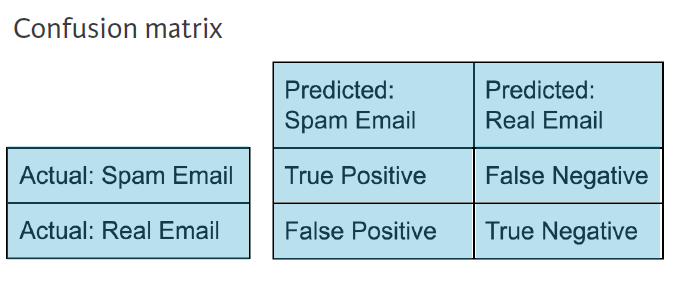

In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_predictions)

array([[8733, 3244],
       [2497, 8855]], dtype=int64)

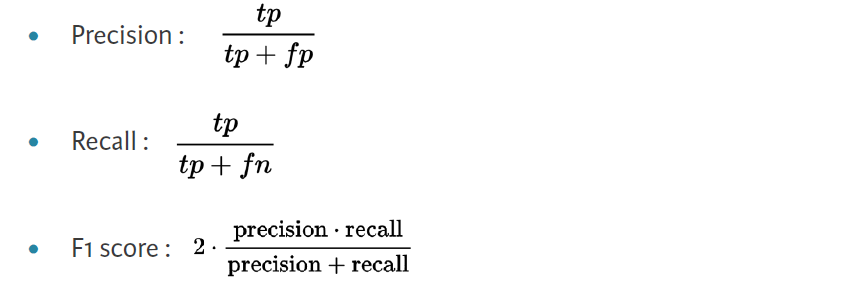

In [48]:
print(classification_report(Y_test,Y_predictions))

              precision    recall  f1-score   support

           0       0.78      0.73      0.75     11977
           1       0.73      0.78      0.76     11352

   micro avg       0.75      0.75      0.75     23329
   macro avg       0.75      0.75      0.75     23329
weighted avg       0.76      0.75      0.75     23329



1.High precision means not many people who don't deserve promotion didn't get promoted.

2.High recall means predicted most people who are likely to get promoted.

In [18]:
print("Accuracy:",accuracy_score(Y_test, Y_predictions))

Accuracy: 0.7539114406961293


In [19]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

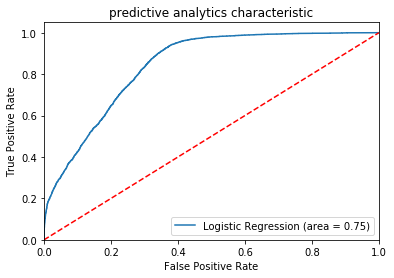

In [20]:
logit_roc_auc = roc_auc_score(Y_test, lrmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, lrmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('predictive analytics characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [21]:
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(lrmodel, X, Y, cv=25)
print(cv_results)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

[0.76031066 0.74343867 0.75549009 0.74792392 0.74738816 0.76158586
 0.76881864 0.74712028 0.77873024 0.77390838 0.74973205 0.75348339
 0.75696677 0.74410504 0.76125402 0.7403537  0.74598071 0.74624866
 0.75669882 0.75133976 0.75375134 0.76152197 0.76098607 0.74196141
 0.77491961]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Finding out using test data given in the problem set

In [22]:
X_testdata = pd.read_csv("test-hr-reg.csv",index_col=0)

In [23]:
X_testdata1 = X_testdata.values

In [24]:
lrmodel.fit(X_traindata_final.values, Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
final_prediction_unknown = lrmodel.predict(X_testdata1)
final_prediction_unknown[0:100]

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [26]:
final_prediction_unknown = final_prediction_unknown.tolist()
X_testdata['prediction']=final_prediction_unknown
final = X_testdata['prediction']

In [27]:
final

employee_id
8724     1
74430    0
72255    0
38562    0
64486    0
46232    0
54542    1
67269    0
66174    0
76303    1
60245    1
42639    0
30963    0
54055    0
42996    0
12737    0
27561    0
26622    1
31582    0
29793    0
72735    0
5677     0
60889    0
51498    0
8566     0
53151    1
16203    1
61083    1
74849    0
13259    0
        ..
72190    0
27155    0
15959    1
72900    1
57683    1
55174    0
51115    0
50134    1
59775    0
14408    0
4351     0
59625    1
29379    0
67979    0
61451    0
73871    0
52090    0
18488    0
59673    1
39410    0
11837    1
78278    1
27284    0
49291    0
47537    0
53478    0
25600    0
45409    0
1186     0
5973     1
Name: prediction, Length: 23490, dtype: int64